In [1]:
import pandas as pd
import os

## Code to get data from one file

In [3]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 


In [4]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

## Code to loop over folder and concatenate data (untested)

In [6]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80%/80% final results/Final second time/newfiles" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data



Loading file: 1-1000 RESULTS 2 new.xlsx
Loading file: 1001-2000 RESULTS 2 new.xlsx
Loading file: 2001-3000 RESULTS 2 new.xlsx
Loading file: 3001-3500 RESULTS 2 new.xlsx
Loading file: 3501-4500 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
4500,36.57623,43.44477,6.58442,34.24018,14.02638,31.23537,28.97889,174.78,15.08,-1.085
4501,18.67904,39.76590,6.43358,37.59854,11.88424,16.48825,25.74947,187.95,15.03,-1.033
4502,18.27380,34.89349,8.67097,34.69962,15.81196,19.46441,36.93303,184.57,17.20,-1.038
4503,17.94913,37.79538,7.37247,37.37619,24.63649,39.67006,31.63889,174.09,15.26,-1.060


In [7]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 80%/80% final results/Final second time" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2

Loading file: 4501-5000 RESULTS 2 new.xlsx


,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,43.234,20.075,6.765,33.040,13.756,21.784,17.480,175.13,12.88,-1.092
1,44.125,32.896,7.134,37.219,29.655,43.020,31.617,157.11,15.31,-1.173
2,40.424,29.486,8.721,37.427,23.588,36.297,30.641,165.04,15.49,-1.122
3,30.442,24.137,7.348,32.985,22.093,37.199,37.782,171.85,16.02,-1.072
4,43.740,31.790,8.113,39.019,15.258,22.693,39.000,171.99,15.93,-1.131
...,...,...,...,...,...,...,...,...,...,...
496,25.001,21.234,6.133,31.444,21.458,31.909,27.892,177.79,15.23,-1.049
497,16.609,27.831,6.183,34.947,13.032,33.838,28.706,182.40,15.29,-1.036
498,28.948,29.888,6.718,34.951,27.799,40.112,30.893,168.71,15.07,-1.080
499,48.392,29.947,9.569,38.304,22.077,41.102,39.719,156.86,15.74,-1.201


In [8]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2,Stress1,Displacement1
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964,177.61,12.70,-1.056
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953,179.11,14.34,-1.045
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717,161.39,15.87,-1.190
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852,175.85,15.53,-1.061
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718,167.65,15.48,-1.120
...,...,...,...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200,177.79,15.23,-1.049
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600,182.40,15.29,-1.036
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300,168.71,15.07,-1.080
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900,156.86,15.74,-1.201


In [9]:
XD = all_data[['diamond', 'ellipse_to_front', 'back_hole', 'ellipse_to_bottom',	'ellipse',	'corner',	'diamond_to_back']]  # multiple features
yD = all_data['Mass2']
XD

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back
0,23.34522,17.94771,6.47656,29.96027,29.58159,24.50710,20.10964
1,23.86908,32.35062,8.06549,44.79751,12.78157,35.97192,15.99953
2,47.97755,43.04191,8.72825,28.88456,13.10839,40.37268,36.37717
3,26.97963,32.79955,6.17146,27.21731,12.26953,41.23892,19.44852
4,37.71778,42.79887,6.58713,34.96774,12.48648,44.46062,30.64718
...,...,...,...,...,...,...,...
5001,25.00100,21.23400,6.13300,31.44400,21.45800,31.90900,27.89200
5002,16.60900,27.83100,6.18300,34.94700,13.03200,33.83800,28.70600
5003,28.94800,29.88800,6.71800,34.95100,27.79900,40.11200,30.89300
5004,48.39200,29.94700,9.56900,38.30400,22.07700,41.10200,39.71900


In [10]:
# creating train and test sets 
from sklearn.model_selection import train_test_split
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 

In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=4)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.9999646 , 0.9999625 , 0.9999559 , 0.999959  , 0.99995981,
       0.9999545 , 0.99973471, 0.99995885, 0.99995959, 0.99994466])

In [13]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [14]:
y_predPipeD = pipeD.predict(XD_test) 
y_predPipeD

array([166.68211511, 182.07891778, 175.58067421, ..., 171.78638249,
       164.06743508, 167.99200718])

R-squared: 1.00
Mean Squared Error: 0.00


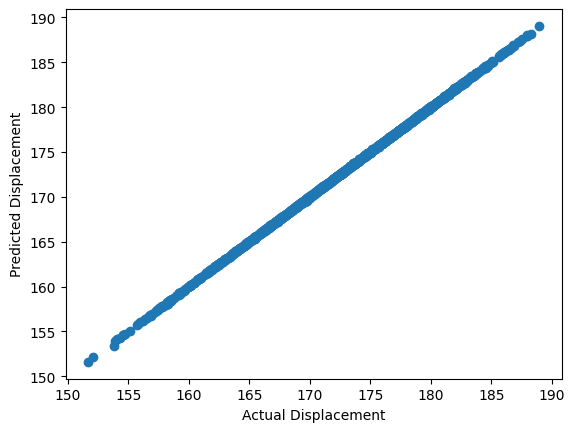

In [15]:
plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predPipeD)
print(f'Mean Squared Error: {mse:.2f}')

In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
KNN2 = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=1,  
                      scoring='r2', 
                      return_train_score=True)
KNN2.fit(XD_train, yD_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2', verbose=1)

In [18]:
y_predKNN2 = KNN2.predict(XD_test) 

R-squared: 0.97
Mean Squared Error: 1.39


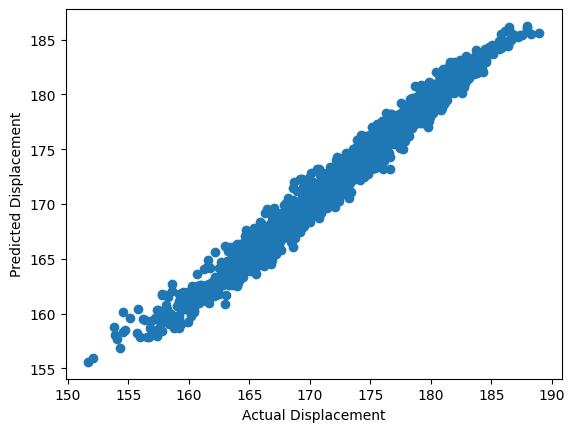

In [19]:
plt.scatter (yD_test, y_predKNN2)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predKNN2)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predKNN2)
print(f'Mean Squared Error: {mse:.2f}')

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [250, 300],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
randF = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'r2')
randF.fit(XD_train, yD_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': [3, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [250, 300]},
             scoring='r2')

In [21]:
randF.best_score_

0.9854171179847964

In [22]:
y_predrandF = randF.predict(XD_test) 

R-squared: 0.99
Mean Squared Error: 0.59


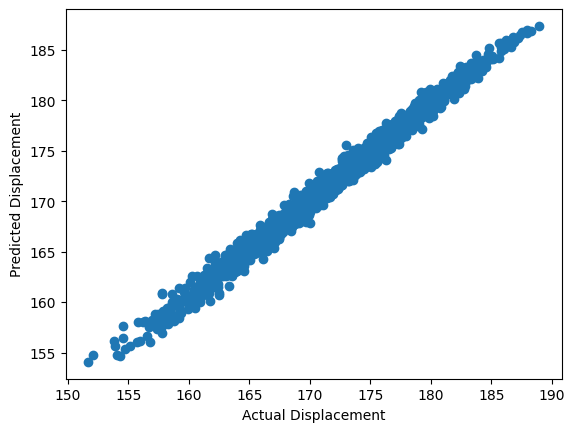

In [23]:
plt.scatter (yD_test, y_predrandF)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predrandF)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predrandF)
print(f'Mean Squared Error: {mse:.2f}')

In [24]:
from sklearn.neural_network import MLPRegressor

In [26]:
# Fitting a Regression model to the train data

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
MLP = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
    scoring ='r2')
MLP.fit(XD_train, yD_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\L

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=5)

In [27]:
MLP.best_score_

0.994708285034223

In [28]:
y_predMLP = MLP.predict(XD_test) 

R-squared: 1.00
Mean Squared Error: 0.11


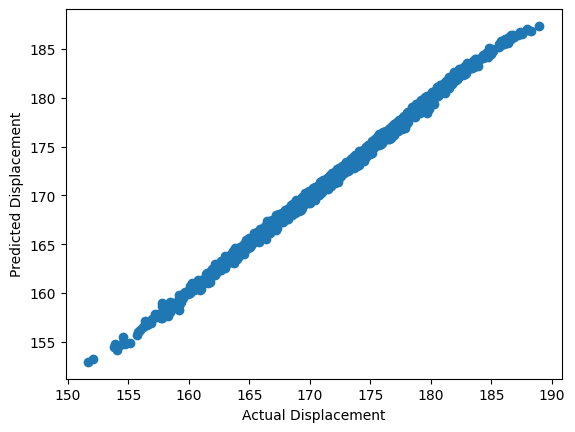

In [29]:
plt.scatter (yD_test, y_predMLP)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predMLP)
print(f'R-squared: {r2:.2f}')
mse = mean_squared_error(yD_test, y_predMLP)
print(f'Mean Squared Error: {mse:.2f}')

In [30]:

## importing class from library
from sklearn.tree import DecisionTreeRegressor

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring = 'r2')

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(XD_train, yD_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [31]:
DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 2, min_samples_leaf = 4)

In [32]:
DTR.fit(XD_train, yD_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4)

In [33]:
y_predDTR = DTR.predict(XD_test) 

R-squared: 0.96


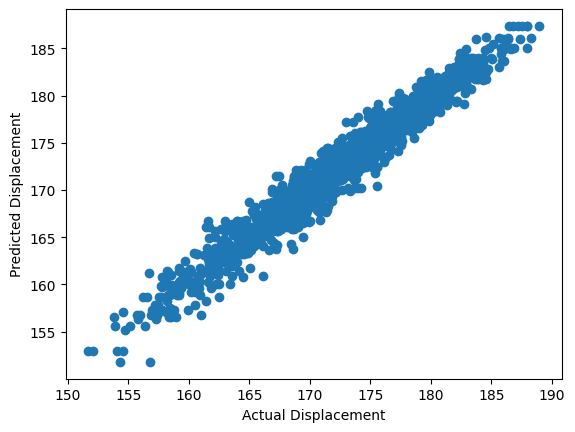

In [34]:
plt.scatter (yD_test, y_predDTR)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predDTR)
print(f'R-squared: {r2:.2f}')

In [35]:
import autogluon as ag
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [36]:
ag_data = all_data.drop(columns=['Displacement1', 'Stress1'])

In [37]:
ag_train, ag_test = train_test_split(ag_data, test_size=0.3, random_state=254)
ag_train

,diamond,ellipse_to_front,back_hole,ellipse_to_bottom,ellipse,corner,diamond_to_back,Mass2
3845,20.67435,24.36923,8.97159,34.47634,28.86006,26.55983,33.84231,175.74
2183,31.98782,25.92935,8.60946,34.96626,12.53422,28.30622,36.35060,177.26
2899,19.38823,39.73903,8.76572,37.06248,27.87612,43.26040,15.27848,170.11
1519,28.12050,22.12720,9.13525,36.16758,28.35263,22.69135,28.78627,174.35
894,26.25726,39.37924,9.37633,32.04919,18.00706,37.57558,20.98034,174.32
...,...,...,...,...,...,...,...,...
391,27.15379,16.59681,7.08017,30.86235,28.17382,34.51652,27.11289,171.91
3775,30.09196,43.41986,8.21188,33.17857,18.17946,21.15603,19.83429,180.26
582,16.19859,25.66939,9.41720,32.98317,18.78237,29.94528,22.82275,180.24
2154,46.81772,31.26666,8.27191,36.63091,25.11940,43.39495,20.05578,157.78


In [38]:
predictor_ag =  TabularPredictor(label='Mass2').fit(ag_train, time_limit=600, presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240802_034940"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          22
Memory Avail:       7.74 GB / 31.61 GB (24.5%)
Disk Space Avail:   592.36 GB / 951.65 GB (62.2%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels\ag-20240802_034940"
Train Data Rows:    3504
Train Data Columns: 7
Label Column:       Mass2
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (188.96, 150.99, 172.44342, 6.88545)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may spe

[1000]	valid_set's rmse: 0.246119
[2000]	valid_set's rmse: 0.23122
[3000]	valid_set's rmse: 0.2266
[4000]	valid_set's rmse: 0.226239
[5000]	valid_set's rmse: 0.225749
[6000]	valid_set's rmse: 0.225405
[7000]	valid_set's rmse: 0.225324
[8000]	valid_set's rmse: 0.225201
[9000]	valid_set's rmse: 0.225202
[10000]	valid_set's rmse: 0.225181


	-0.2252	 = Validation score   (-root_mean_squared_error)
	34.71s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 561.94s of the 561.94s of remaining time.


[1000]	valid_set's rmse: 0.381116
[2000]	valid_set's rmse: 0.377953
[3000]	valid_set's rmse: 0.377507
[4000]	valid_set's rmse: 0.377383
[5000]	valid_set's rmse: 0.377382
[6000]	valid_set's rmse: 0.377378
[7000]	valid_set's rmse: 0.377376
[8000]	valid_set's rmse: 0.377375
[9000]	valid_set's rmse: 0.377375
[10000]	valid_set's rmse: 0.377374


	-0.3774	 = Validation score   (-root_mean_squared_error)
	33.93s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 527.32s of the 527.32s of remaining time.
	-0.82	 = Validation score   (-root_mean_squared_error)
	0.83s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 526.34s of the 526.34s of remaining time.
	-0.1479	 = Validation score   (-root_mean_squared_error)
	71.33s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 454.96s of the 454.96s of remaining time.
	-0.7096	 = Validation score   (-root_mean_squared_error)
	0.49s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 454.33s of the 454.33s of remaining time.
	-0.2768	 = Validation score   (-root_mean_squared_error)
	4.19s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost

[1000]	valid_set's rmse: 0.62531
[2000]	valid_set's rmse: 0.625119
[3000]	valid_set's rmse: 0.625118
[4000]	valid_set's rmse: 0.625118


	-0.6251	 = Validation score   (-root_mean_squared_error)
	23.78s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 396.76s of remaining time.
	Ensemble Weights: {'CatBoost': 0.632, 'LightGBMXT': 0.211, 'NeuralNetFastAI': 0.158}
	-0.1224	 = Validation score   (-root_mean_squared_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 203.32s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 4698.8 rows/s (500 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels\ag-20240802_034940")


In [39]:
ag_pred = predictor_ag.predict(ag_test.drop(columns=['Mass2']))

In [40]:
predictor_ag.evaluate(ag_test, silent=True)

{'root_mean_squared_error': -0.13135765941462518,
 'mean_squared_error': -0.017254834686888668,
 'mean_absolute_error': -0.08679820013744712,
 'r2': 0.9996477661731358,
 'pearsonr': 0.9998350496810676,
 'median_absolute_error': -0.0683871459960983}